In [1]:
# Importing libararies for neural network

import tensorflow as tf
from tensorflow import keras

# Importing libararies for data manipulation

import pandas as pd
import numpy as np

# Importing libraries for data visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0]

9

In [6]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [7]:
y_train[0].shape

()

In [8]:
x_train_scaled = x_train/255
x_test_scaled  = x_test/255

In [11]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10)
y_train_categorical[:4]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
def show_images(x):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[x])

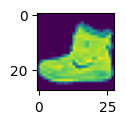

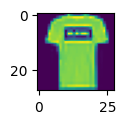

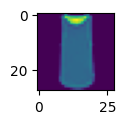

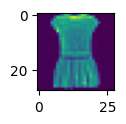

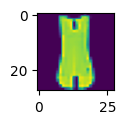

In [14]:
for i in range(5):
    show_images(i)

In [15]:
y_test.shape

(10000,)

In [16]:
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10)
y_test_categorical[:4]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
def show_images(x):
    plt.figure(figsize=(10,1))
    plt.imshow(x_test[x])

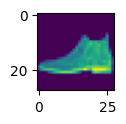

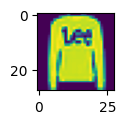

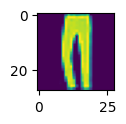

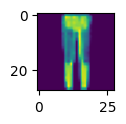

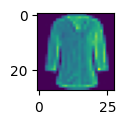

In [18]:
for i in range(5):
    show_images(i)

In [20]:
28*28

784

In [26]:
x_train[0].shape

(28, 28)

In [28]:
# model building

model = keras.Sequential([
    keras.layers.Flatten(input_shape= (x_train[0].shape)),
    keras.layers.Dense(700, activation='relu'),
    keras.layers.Dense(600, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer= 'SGD',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 69s 35ms/step - loss: 0.7752 - accuracy: 0.7295
Epoch 2/5
1875/1875 [==============================] - 65s 34ms/step - loss: 0.4515 - accuracy: 0.8371
Epoch 3/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.3889 - accuracy: 0.8598
Epoch 4/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.3531 - accuracy: 0.8708
Epoch 5/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.3296 - accuracy: 0.8787


In [30]:
%%timeit -n1 -r1

# model building
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (x_train[0].shape)),
    keras.layers.Dense(700, activation='relu'),
    keras.layers.Dense(600, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer= 'SGD',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_scaled, y_train_categorical, epochs=1)

1875/1875 [==============================] - 69s 35ms/step - loss: 0.7754 - accuracy: 0.7237
1min 10s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [31]:
%%timeit -n1 -r1
#time

# model building
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (x_train[0].shape)),
    keras.layers.Dense(700, activation='relu'),
    keras.layers.Dense(600, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer= 'SGD',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 71s 35ms/step - loss: 0.7335 - accuracy: 0.7502
Epoch 2/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.4390 - accuracy: 0.8429
Epoch 3/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.3837 - accuracy: 0.8613
Epoch 4/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.3501 - accuracy: 0.8726
Epoch 5/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.3281 - accuracy: 0.8795
5min 28s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [32]:
model.evaluate(x_test_scaled, y_test_categorical)

313/313 [==============================] - 6s 15ms/step - loss: 0.3865 - accuracy: 0.8585


[0.3865000903606415, 0.8585000038146973]